In [1]:
import numpy as np
rnd_gen = np.random.default_rng(2024)
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from online_cp.CPS import NearestNeighboursPredictionMachine

MACHINE_EPSILON = np.finfo(np.float64).eps

In [11]:
N = 2000
# X = rnd_gen.normal(loc=0, scale=1, size=(N, 1))
# beta = np.array([1])#, 1, 0, 0])
# Y = X @ beta + rnd_gen.normal(loc=0, scale=1, size=N)

In [12]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name="house_sales", version=3, parser="auto")

X = dataset.data.values.astype(float)[:N]
Y = dataset.target.values.astype(float)[:N]

In [13]:
# x = rnd_gen.normal(loc=0, scale=1, size=(1, 1))
x = dataset.data.values.astype(float)[N]

In [14]:
self = NearestNeighboursPredictionMachine(k=31)
self.learn_initial_training_set(X, Y)

In [15]:
cpd = self.predict_cpd(x, save_time=True)

{1: 111, 2: 140, 3: 150, 4: 183, 5: 244, 6: 337, 7: 353, 8: 420, 9: 462, 10: 506, 11: 568, 12: 628, 13: 634, 14: 868, 15: 962, 16: 998, 17: 1004, 18: 1150, 19: 1173, 20: 1193, 21: 1366, 22: 1406, 23: 1616, 24: 1626, 25: 1665, 26: 1751, 27: 1815, 28: 318, 29: 1124, 30: 1136, 31: 1883, 32: 773, 33: 800, 34: 816, 35: 1014, 36: 1155, 37: 1194, 38: 1693, 39: 1717}
[ 111  140  150  183  244  337  353  420  462  506  568  628  634  868
  962  998 1004 1150 1173 1193 1366 1406 1616 1626 1665 1751 1815  318
 1124 1136 1883  773  800  816 1014 1155 1194 1693 1717]
[ 4 24 16  9 17 38 22 36 34 31 23 19 39 14 30 37 15 35  7 32 21 27  5  8
 26 18 29 10  3 13 12 28  1 11 33 20 25  2  6]


In [16]:
cpd.time_dict

{'Compute distance matrix': 0.011291027069091797,
 'Sort distance matrix': 0.20297908782958984,
 'Find all neighbours and semi-neighbours': 0.013183355331420898,
 'Loop': 0.00037741661071777344}

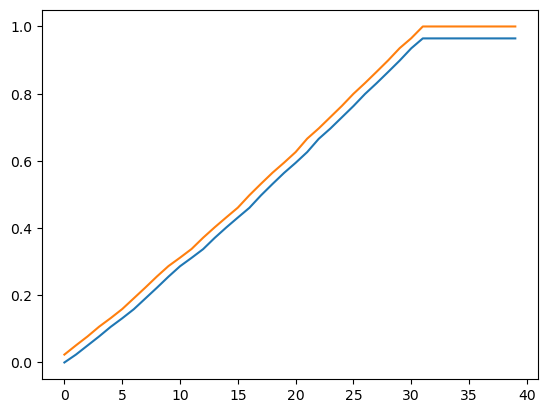

In [17]:
plt.plot(cpd.L)
plt.plot(cpd.U)

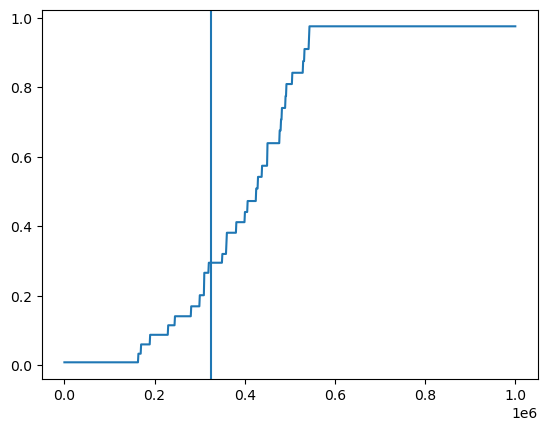

In [18]:
tau = np.random.uniform(0, 1)
yrange = np.linspace(0, 1000000, num=1000, endpoint=True)
plt.plot(
    yrange,
    [cpd(y=y, tau=tau) for y in yrange]
)
plt.axvline(dataset.target.values.astype(float)[-1])

In [19]:
print(dataset.target.values.astype(float)[-1])
print(cpd.predict_set(tau, epsilon=0.1))
cpd.err(cpd.predict_set(tau, epsilon=0.1), dataset.target.values.astype(float)[-1])

325000.0
(209999.99999964604, 554999.9999995392)


0

# Manually go through the algorithm

In [7]:
d = self.distance_func(self.X, x)
D = self.update_distance_matrix(self.D, d)
y = np.append(self.y, -np.inf) # Initialise label as -inf

In [8]:
k_nearest = D.argsort(axis=0)[1:self.k+1]

In [9]:
k_nearest_of_n = k_nearest.T[-1]

In [10]:
k_nearest_of_n
k_nearest.T[2]

array([ 186, 1186, 1901, 1551, 1642,  739, 1369, 1630,  907,  665,  862,
         23, 1952,   59,  889,  888, 1898, 1522,  880,  190,  767,   44,
       1343,  268,  118, 1567, 1501, 1485,  725,  630, 1537])

In [11]:
X.shape[0]

2000

In [67]:
n = self.X.shape[0]

full_neighbours = []
single_neighbours = []
semi_neighbours = []
idx_all_neighbours_and_semi_neighbours = []

for i, col in enumerate(k_nearest.T):
    if i in k_nearest_of_n and n in col:
        print(f'z_{i} is a full neighbour')
        idx_all_neighbours_and_semi_neighbours.append(i)
        full_neighbours.append((self.X[i], self.y[i]))
    if i in k_nearest_of_n and not n in col:
        print(f'z_{i} is a single neighbour')
        idx_all_neighbours_and_semi_neighbours.append(i)
        single_neighbours.append((self.X[i], self.y[i]))
    if not i in k_nearest_of_n and n in col:
        print(f'z_{i} is a semi-neighbour')
        idx_all_neighbours_and_semi_neighbours.append(i)
        semi_neighbours.append((self.X[i], self.y[i]))
all_neighbours_and_semi_neighbours = full_neighbours + single_neighbours + semi_neighbours
all_neighbours = full_neighbours + single_neighbours
Kprime = len(idx_all_neighbours_and_semi_neighbours)

z_111 is a full neighbour
z_140 is a full neighbour
z_150 is a full neighbour
z_183 is a full neighbour
z_244 is a full neighbour
z_318 is a single neighbour
z_337 is a full neighbour
z_353 is a full neighbour
z_420 is a full neighbour
z_462 is a full neighbour
z_506 is a full neighbour
z_568 is a full neighbour
z_628 is a full neighbour
z_634 is a full neighbour
z_773 is a semi-neighbour
z_800 is a semi-neighbour
z_816 is a semi-neighbour
z_868 is a full neighbour
z_962 is a full neighbour
z_998 is a full neighbour
z_1004 is a full neighbour
z_1014 is a semi-neighbour
z_1124 is a single neighbour
z_1136 is a single neighbour
z_1150 is a full neighbour
z_1155 is a semi-neighbour
z_1173 is a full neighbour
z_1193 is a full neighbour
z_1194 is a semi-neighbour
z_1366 is a full neighbour
z_1406 is a full neighbour
z_1616 is a full neighbour
z_1626 is a full neighbour
z_1665 is a full neighbour
z_1693 is a semi-neighbour
z_1717 is a semi-neighbour
z_1751 is a full neighbour
z_1815 is a ful

In [68]:
all_neighbours_and_semi_neighbours

[(array([ 3.00000e+00,  1.75000e+00,  1.26000e+03,  3.32800e+03,
          1.00000e+00,  0.00000e+00,  0.00000e+00,  5.00000e+00,
          6.00000e+00,  7.00000e+02,  5.60000e+02,  1.90500e+03,
          0.00000e+00,  9.81030e+04,  4.76823e+01, -1.22349e+02,
          1.38000e+03,  3.53600e+03,  2.01500e+03,  3.00000e+00,
          4.00000e+00]),
  570000.0),
 (array([ 2.00000e+00,  1.00000e+00,  1.11000e+03,  3.20000e+03,
          1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
          7.00000e+00,  1.11000e+03,  0.00000e+00,  1.92500e+03,
          0.00000e+00,  9.81190e+04,  4.76338e+01, -1.22358e+02,
          1.17000e+03,  3.60000e+03,  2.01400e+03,  6.00000e+00,
          2.70000e+01]),
  665000.0),
 (array([ 3.00000e+00,  2.00000e+00,  1.36000e+03,  3.09000e+03,
          2.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
          8.00000e+00,  1.36000e+03,  0.00000e+00,  1.99000e+03,
          0.00000e+00,  9.81030e+04,  4.76838e+01, -1.22353e+02,
          1.50

In [14]:
k_nearest_of_n

array([1665,  506, 1193, 1616,  568, 1751,  353,  634, 1004,  140,  337,
        962,  462,  183, 1406, 1173,  111, 1815,  318,  244, 1150,  150,
        628, 1883,  420, 1136,  998, 1124, 1366, 1626,  868])

In [15]:
Y = np.zeros(shape=Kprime + 2)
Y[0] = -np.inf
Y[-1] = np.inf
Y[1:-1] = y[idx_all_neighbours_and_semi_neighbours]
Y.sort()

In [16]:
all_neighbours_and_semi_neighbours

array([570000., 665000., 532170., 163500., 480000., 791500., 437500.,
       482000., 230000., 529000., 610000., 543500., 542000., 381156.,
       425000., 189950., 245000., 492000., 359000., 655000., 450000.,
       300000., 349500., 169317., 662990., 490000., 477000., 548000.,
       505000., 400000., 320000., 450000., 650000., 310000., 429000.,
       310000., 406000., 281000., 360000.])

In [17]:
i = -2
y[k_nearest.T[i]] < y[i]

array([ True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [57]:
Alpha = np.array([(y[k_nearest.T[i]] <= y_i).sum() for i, y_i in enumerate(y)])
Alpha

array([ 4, 18,  2, ..., 21, 24,  0])

In [58]:
N = np.array([(Alpha == k).sum() for k in range(self.k+1)])
N

array([47, 55, 53, 58, 51, 54, 64, 63, 66, 63, 50, 52, 66, 63, 59, 58, 74,
       68, 66, 60, 63, 79, 62, 66, 67, 72, 65, 67, 68, 73, 59, 70])

In [59]:
L = -np.inf * np.ones(Kprime+1) # Initialize at something unreasonable
U = -np.inf * np.ones(Kprime+1) # Initialize at something unreasonable
L[0] = 0
U[0] = N[0]/(n+1)

In [60]:
N

array([47, 55, 53, 58, 51, 54, 64, 63, 66, 63, 50, 52, 66, 63, 59, 58, 74,
       68, 66, 60, 63, 79, 62, 66, 67, 72, 65, 67, 68, 73, 59, 70])

In [61]:
len(full_neighbours + single_neighbours)

31

In [72]:
Y.shape

(41,)

In [71]:
np.unique(Y).shape

(39,)

In [62]:
for k in range(1, Kprime+1):
    if (Y[k] in full_neighbours + single_neighbours):
        N[Alpha[-1]] -= 1
        Alpha[-1] += 1
        N[Alpha[-1]] += 1
        print(f'k: {k}, Alpha: {Alpha[-1]}')
    if (Y[k] in full_neighbours + semi_neighbours):
        idx = np.argwhere(y == Y[k])[0, 0]
        N[Alpha[idx]] -= 1
        Alpha[idx] -= 1
        N[Alpha[idx]] += 1
    L[k] = N[:Alpha[-1]].sum() / (n+1) if Alpha[-1] != 0  else 0
    U[k] = N[:Alpha[-1] + 1].sum() / (n+1) if Alpha[-1] != 0  else N[0] / (n+1)

k: 1, Alpha: 1
k: 2, Alpha: 2
k: 3, Alpha: 3
k: 4, Alpha: 4
k: 5, Alpha: 5
k: 7, Alpha: 6
k: 10, Alpha: 7
k: 11, Alpha: 8
k: 12, Alpha: 9
k: 14, Alpha: 10
k: 15, Alpha: 11
k: 17, Alpha: 12
k: 19, Alpha: 13
k: 20, Alpha: 14
k: 21, Alpha: 15
k: 22, Alpha: 16
k: 23, Alpha: 17
k: 24, Alpha: 18
k: 25, Alpha: 19
k: 26, Alpha: 20
k: 27, Alpha: 21
k: 28, Alpha: 22
k: 29, Alpha: 23
k: 30, Alpha: 24
k: 31, Alpha: 25
k: 32, Alpha: 26
k: 33, Alpha: 27
k: 34, Alpha: 28
k: 36, Alpha: 29
k: 37, Alpha: 30
k: 38, Alpha: 31


IndexError: index 32 is out of bounds for axis 0 with size 32

In [25]:
Alpha

array([4, 0, 0, 2, 0, 2, 1, 3, 3, 3, 1, 4, 3, 5, 1, 5, 1, 0, 5, 1, 5])

In [26]:
L

array([0.        , 0.19047619, 0.38095238, 0.42857143, 0.71428571,
       0.71428571, 0.80952381, 0.80952381])

In [27]:
U

array([0.19047619, 0.38095238, 0.47619048, 0.76190476, 0.80952381,
       0.80952381, 1.        , 1.        ])

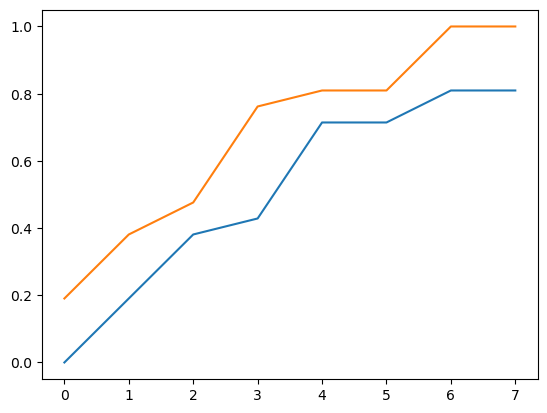

In [28]:
import matplotlib.pyplot as plt
plt.plot(L)
plt.plot(U)

In [29]:
cpd = self.predict_cpd(x)

z_3 is a full neighbour
z_5 is a semi-neighbour
z_11 is a full neighbour
z_12 is a single neighbour
z_14 is a semi-neighbour
z_17 is a full neighbour
z_19 is a full neighbour
Alpha: [4 0 0 3 0 3 1 3 3 3 1 5 3 5 2 5 1 1 5 2 0]
N: [4 4 2 6 1 4]


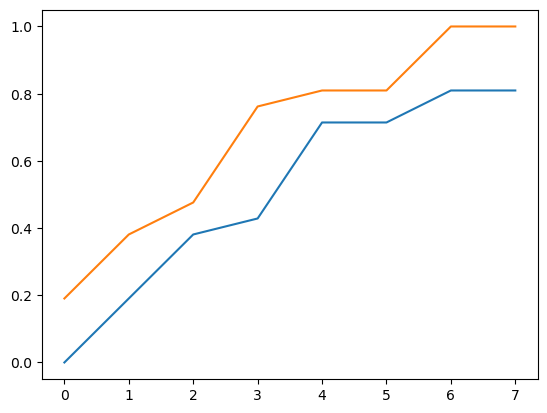

In [30]:
plt.plot(cpd.L)
plt.plot(cpd.U)